<a href="https://colab.research.google.com/github/dwds186/alphaco_test/blob/main/20241011/alphaco_241011jaehyun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123621 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


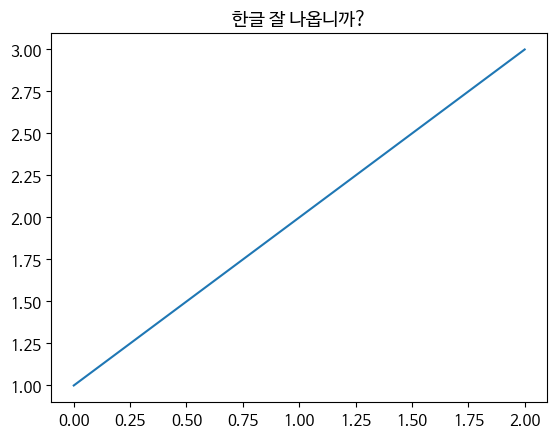

In [3]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 시계열 데이터 (時系列, 영어: time series)
- 일정 시간 간격으로 배치된 데이터셋


## pandas 시간을 다루는 클래스, Timestamp라는 클래스가 있음


In [5]:
import pandas as pd
ts = pd.to_datetime("2024-10-11")
print(type(ts), ts) #<class 'pandas._libs.tslibs.timestamps.Timestamp'> #2024-10-11 00:00:00

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2024-10-11 00:00:00


In [6]:
import pandas as pd
ts = pd.to_datetime("2024-10-11 09:33:00")
print(type(ts), ts) # 날짜와시간을임의로설정할수도있음 #<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2024-10-11 09:33:00

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2024-10-11 09:33:00


In [7]:
import pandas as pd
ts = pd.to_datetime("2024-10-11 090000")
print(type(ts), ts) #<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2024-10-11 09:00:00

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2024-10-11 09:00:00


## 나라마다 다른 날짜 표기법
- 우리나라 : 연도/월/일
- 미국 : 월/일/연도
- 영국 : 일/월/연도








In [8]:
#미국식표기법잘나옴!
ts = pd.to_datetime("06/07/20")  # 2020-06-07
print(type(ts), ts)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2020-06-07 00:00:00


https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior <-- 날짜 데이터 포맷을 다룰 때 사용하는 방법
Python documentationPython documentation
datetime — Basic date and time types
Source code: Lib/datetime.py The datetime module supplies classes for manipulating dates and times. While date and time arithmetic is supported, the focus of the implementation is on efficient attr...



https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [9]:
#영국식으로 시도하다가 실패함
ts = pd.to_datetime("07/06/20")
print(type(ts), ts)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2020-07-06 00:00:00


In [10]:
#영국은 일월연도임
'''
format이라는 매개변수를 이용해서 영국식으로 표현할 수 있음!
이런거 일일이 세세하게 하나하나 다 기억 못 하니까 chat gpt한테 물어보는 식으로 해결하세요
'''
ts = pd.to_datetime("07/06/20", format='%d/%m/%y')   # 2020-06-07 이제 이렇게 잘 나옴
print(type(ts), ts)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2020-06-07 00:00:00


#Timestamp클래스속성활용

In [11]:
#Timestamp클래스안의속성을활용해서연도,월,요일,시분초등을전부뽑을수있음
ts=pd.to_datetime("2024-10-11 09:45:10")
print(ts)
print(ts.year)
print(ts.month)
print(ts.day)
print(ts.quarter)
print(ts.daysinmonth) #10월은31일까지있음
print(ts.days_in_month)
print(ts.dayofyear) #오늘이2024년의285일째임


2024-10-11 09:45:10
2024
10
11
4
31
31
285


In [12]:
#날짜를다시원래문자로변환
ts.strftime("%y-%m-%d") # '24-10-11' timestamp클래스를문자열로변경하겠다


'24-10-11'

In [13]:
#날짜를다시원래문자로변환
ts.strftime("%m-%d-%y") # '24-10-11' timestamp클래스를문자열로변경하겠다
# 미국식으로출력

'10-11-24'

In [14]:
#날짜를다시원래문자로변환
ts.strftime("%d-%m-%y") # '24-10-11' timestamp클래스를문자열로변경하겠다
# 영국식으로출력

'11-10-24'

## Timedelta
- 시간 연산

In [15]:
pd.Timedelta(days=100,hours=2,minutes=30,seconds=30) #Timedelta('100 days 02:30:30')
temp = pd.Timedelta(days=100,hours=2,minutes=30,seconds=30)
type(temp), temp #(pandas._libs.tslibs.timedeltas.Timedelta, Timedelta('100 days 02:30:30'))

(pandas._libs.tslibs.timedeltas.Timedelta, Timedelta('100 days 02:30:30'))

In [16]:
ts

Timestamp('2024-10-11 09:45:10')

In [17]:
ts1=pd.to_datetime("2024-10-11 09:45:10")

In [18]:
#ts+ts1
'''
TypeError                                 Traceback (most recent call last)
<ipython-input-45-d60f86426511> in <cell line: 1>()
----> 1 ts+ts1

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'
'''
print("에러발생함!")

에러발생함!


In [19]:
ts+temp #더하기가능

Timestamp('2025-01-19 12:15:40')

In [20]:
ts-temp #빼기가능

Timestamp('2024-07-03 07:14:40')

In [21]:
dates=['2024-10-09','2024-10-10', '2024-10-11']
idx=pd.to_datetime(dates)
idx #DatetimeIndex(['2024-10-09', '2024-10-10', '2024-10-11'], dtype='datetime64[ns]', freq=None)
#형태가리스트처럼생겼어
#데이트타임도인덱싱,슬라이싱등가능
#리스트는인덱싱,슬라이싱등가능해

DatetimeIndex(['2024-10-09', '2024-10-10', '2024-10-11'], dtype='datetime64[ns]', freq=None)

In [22]:
idx[0]

Timestamp('2024-10-09 00:00:00')

In [23]:
idx[2]

Timestamp('2024-10-11 00:00:00')

In [24]:
idx[0:2]

DatetimeIndex(['2024-10-09', '2024-10-10'], dtype='datetime64[ns]', freq=None)

In [25]:
idx.year #Index([2024, 2024, 2024], dtype='int32')

Index([2024, 2024, 2024], dtype='int32')

In [26]:
idx.month

Index([10, 10, 10], dtype='int32')

In [27]:
idx.day

Index([9, 10, 11], dtype='int32')

## Unix Time (유닉스시간)
it업계 시사상식!

- 1970년 1월 1일
가끔작업하다보면1970년1월1일이뜰때가있음
일종의표준시간을정했는데그날짜임


In [28]:
#1628899200 # 이런식으로 출력이 되면 유닉스타임이후경과한시간을초로계산한것임
#초로환산해서정수로나타낸것
day=1628899200/60/60/24
day#1628899200
year=day/365
year#51.652054794520545 51년정도지났음

51.652054794520545

In [29]:
dt=pd.to_datetime(1628899200,unit='s')
dt

Timestamp('2021-08-14 00:00:00')

## 데이터프레임 연습

In [30]:
data = [
    {'시가': 100, '고가': 110, '저가': 90, '종가': 105},
    {'시가': 100, '고가': 112, '저가': 80, '종가':  95},
    {'시가':  99, '고가': 115, '저가': 70, '종가':  85},
    {'시가':  70, '고가':  80, '저가': 60, '종가':  75},
]

#날짜index가이런식으로문자열로되어있으면안좋음...예를들어서6월15일과16일전부가져오고싶다면?
#예를들어서7월데이터만가지고오고싶다면그러면전부조건식을만들어서truefalse로해서가지고와야함
#굉장히불편함
df = pd.DataFrame(data, index=['20200615', '20200616', '20200717', '20200718'])
df

,시가,고가,저가,종가
20200615,100,110,90,105
20200616,100,112,80,95
20200717,99,115,70,85
20200718,70,80,60,75


## 날짜 변환

In [31]:
# 조건식 vs pd.to_datetime 비교
#cond = df.index.str[:6] == "202006"
#df.loc[cond]

In [32]:
df.index = pd.to_datetime(df.index)
df.loc['2020-06']

,시가,고가,저가,종가
2020-06-15,100,110,90,105
2020-06-16,100,112,80,95


#KRX API 크롤링
- 쉬운방법

In [33]:
!pip install pykrx -q
#colab에 기본 내장되어 있지는 않을테니 install하자

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.3/254.3 kB 16.0 MB/s eta 0:00:00


In [34]:
import pykrx
print(pykrx.__version__)

1.0.48


In [35]:
from pykrx import stock
tickers=stock.get_market_ticker_list("20241010")
print(len(tickers), tickers)

958 ['095570', '006840', '027410', '282330', '138930', '001460', '001465', '001040', '079160', '00104K', '000120', '011150', '011155', '001045', '097950', '097955', '000480', '000590', '012030', '016610', '005830', '000990', '139130', '001530', '000210', '000215', '375500', '37550L', '37550K', '007340', '004840', '155660', '069730', '017860', '017940', '365550', '383220', '007700', '114090', '078930', '006360', '001250', '007070', '078935', '012630', '039570', '089470', '294870', '009540', '267250', '267270', '443060', '071970', '010620', '322000', '042670', '267260', '329180', '097230', '014790', '003580', '204320', '060980', '011200', '035000', '002460', '487570', '298050', '003560', '175330', '234080', '001060', '001067', '001065', '096760', '105560', '432320', '002380', '344820', '009070', '009440', '119650', '092220', '003620', '016380', '001390', '033180', '015590', '001940', '025000', '092230', '000040', '044450', '030200', '033780', '058850', '058860', '093050', '003550', '0342

In [36]:
tickers=stock.get_market_ticker_list(market='KOSDAQ')
print(len(tickers), tickers)

1754 ['060310', '054620', '265520', '211270', '109960', '139050', '126600', '013720', '083790', '035760', '311690', '051500', '058820', '023460', '056730', '065770', '083660', '456440', '477760', '099520', '060900', '290120', '025440', '068790', '241520', '180400', '245620', '037370', '050120', '214270', '130500', '900290', '083450', '297890', '440290', '078150', '195940', '028300', '278650', '067630', '024850', '047920', '115450', '046210', '403870', '036640', '439730', '442770', '448760', '467930', '469480', '095340', '950170', '067290', '035900', '318000', '024840', '024120', '455250', '458320', '464680', '476470', '478390', '486630', '021320', '036670', '044180', '046440', '151860', '035600', '226360', '111870', '060720', '058400', '101000', '122450', '052900', '376190', '061970', '309960', '225190', '060370', '417200', '078020', '476080', '086960', '038340', '160550', '053290', '060250', '104200', '222160', '024940', '218410', '327260', '091340', '419530', '019550', '950110', '036

In [37]:
tickers=stock.get_index_ticker_list("20241010")
print(tickers)

['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1024', '1025', '1026', '1027', '1028', '1034', '1035', '1150', '1151', '1152', '1153', '1154', '1155', '1156', '1157', '1158', '1159', '1160', '1167', '1182', '1224', '1227', '1232', '1244', '1894']


In [38]:
for t in tickers:
    name=stock.get_index_ticker_name(t)
    print(t,name)

1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업
1021 금융업
1024 증권
1025 보험
1026 서비스업
1027 제조업
1028 코스피 200
1034 코스피 100
1035 코스피 50
1150 코스피 200 커뮤니케이션서비스
1151 코스피 200 건설
1152 코스피 200 중공업
1153 코스피 200 철강/소재
1154 코스피 200 에너지/화학
1155 코스피 200 정보기술
1156 코스피 200 금융
1157 코스피 200 생활소비재
1158 코스피 200 경기소비재
1159 코스피 200 산업재
1160 코스피 200 헬스케어
1167 코스피 200 중소형주
1182 코스피 200 초대형제외 지수
1224 코스피 200 비중상한 30%
1227 코스피 200 비중상한 25%
1232 코스피 200 비중상한 20%
1244 코스피200제외 코스피지수
1894 코스피 200 TOP 10


In [39]:
df = stock.get_market_ohlcv("20220720", "20220810", "005930")
print(df.head(3))
#005930삼성전자 어제 여러 줄로 코딩했던 것을 이렇게 끝내버림ㅋ

               시가     고가     저가     종가       거래량       등락률
날짜                                                        
2022-07-20  61800  62100  60500  60500  16782238 -0.656814
2022-07-21  61100  61900  60700  61800  12291374  2.148760
2022-07-22  61800  62200  61200  61300  10261310 -0.809061


In [40]:
df = stock.get_market_ohlcv("20240401", "20241010", "005930")
print(df.head(3))

               시가     고가     저가     종가       거래량       등락률
날짜                                                        
2024-04-01  83200  83300  82000  82000  20116513 -0.485437
2024-04-02  82900  85000  82900  85000  37077944  3.658537
2024-04-03  84300  85000  83500  84100  30493347 -1.058824


In [41]:
df = stock.get_market_ohlcv("20240401", "20241010", "005930")
print(df.tail(3))

               시가     고가     저가     종가       거래량       등락률
날짜                                                        
2024-10-07  60200  61900  59500  61000  35066533  0.660066
2024-10-08  60000  61000  59900  60300  27411786 -1.147541
2024-10-10  60100  60200  58900  58900  45262214 -2.321725


In [42]:
import time
count = 0
for t in tickers:
    if count >5:
        break
    name=stock.get_index_ticker_name(t)
    print(t,name)
    time.sleep(1)
    count += 1


1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복


In [43]:
import time
for ticker in stock.get_market_ticker_list("20190225")[:5]:
    df = stock.get_market_ohlcv("20181210", "20181212", ticker)
    print(df.head())
    time.sleep(1)

              시가    고가    저가    종가     거래량       등락률
날짜                                                  
2018-12-10  4840  4840  4670  4750   32310 -2.061856
2018-12-11  4685  4750  4585  4585   37975 -3.473684
2018-12-12  4605  4605  4520  4540  102752 -0.981461
               시가     고가     저가     종가     거래량       등락률
날짜                                                      
2018-12-10  12900  13200  12750  13000  206925 -0.763359
2018-12-11  13100  13100  12500  12550  206669 -3.461538
2018-12-12  12650  13150  12450  13150  213365  4.780876
               시가     고가     저가     종가    거래량       등락률
날짜                                                     
2018-12-10  55400  56200  54900  55800  28618  0.722022
2018-12-11  55800  56200  54900  55100  24302 -1.254480
2018-12-12  55400  55900  54900  55900  13179  1.451906
              시가    고가    저가    종가     거래량       등락률
날짜                                                  
2018-12-10  7900  8000  7830  7900  103028 -1.250000
2018-12-11 

- 첫번째 미션, 난수 생성
- 두번째 미션, ticker에 매칭되는 종목명도 같이 출력
힌트
for ticker in stock.get_market_ticker_list():
        종목 = stock.get_market_ticker_name(ticker)
        print(종목)

In [44]:
import time
import random
for ticker in stock.get_market_ticker_list("20190225")[:5]:
    df = stock.get_market_ohlcv("20181210", "20181212", ticker)
    종목 = stock.get_market_ticker_name(ticker)
    print(df.head())
    print("종목 이름 :", 종목)
    time.sleep(random.randrange(1,10))

              시가    고가    저가    종가     거래량       등락률
날짜                                                  
2018-12-10  4840  4840  4670  4750   32310 -2.061856
2018-12-11  4685  4750  4585  4585   37975 -3.473684
2018-12-12  4605  4605  4520  4540  102752 -0.981461
종목 이름 : AJ네트웍스
               시가     고가     저가     종가     거래량       등락률
날짜                                                      
2018-12-10  12900  13200  12750  13000  206925 -0.763359
2018-12-11  13100  13100  12500  12550  206669 -3.461538
2018-12-12  12650  13150  12450  13150  213365  4.780876
종목 이름 : SK렌터카
               시가     고가     저가     종가    거래량       등락률
날짜                                                     
2018-12-10  55400  56200  54900  55800  28618  0.722022
2018-12-11  55800  56200  54900  55100  24302 -1.254480
2018-12-12  55400  55900  54900  55900  13179  1.451906
종목 이름 : AK홀딩스
              시가    고가    저가    종가     거래량       등락률
날짜                                                  
2018-12-10  7900  800

In [45]:
#쌤 코드
import time
import random
for ticker in stock.get_market_ticker_list("20190225")[:5]:
    df = stock.get_market_ohlcv("20181210", "20181212", ticker)
    종목 = stock.get_market_ticker_name(ticker)
    df['종목명'] = 종목
    print(df.head())
    time.sleep(random.randint(1, 5))

              시가    고가    저가    종가     거래량       등락률     종목명
날짜                                                          
2018-12-10  4840  4840  4670  4750   32310 -2.061856  AJ네트웍스
2018-12-11  4685  4750  4585  4585   37975 -3.473684  AJ네트웍스
2018-12-12  4605  4605  4520  4540  102752 -0.981461  AJ네트웍스


<ipython-input-45-2d64f9b2c7b6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['종목명'] = 종목


               시가     고가     저가     종가     거래량       등락률    종목명
날짜                                                             
2018-12-10  12900  13200  12750  13000  206925 -0.763359  SK렌터카
2018-12-11  13100  13100  12500  12550  206669 -3.461538  SK렌터카
2018-12-12  12650  13150  12450  13150  213365  4.780876  SK렌터카
               시가     고가     저가     종가    거래량       등락률    종목명
날짜                                                            
2018-12-10  55400  56200  54900  55800  28618  0.722022  AK홀딩스
2018-12-11  55800  56200  54900  55100  24302 -1.254480  AK홀딩스
2018-12-12  55400  55900  54900  55900  13179  1.451906  AK홀딩스
              시가    고가    저가    종가     거래량       등락률  종목명
날짜                                                       
2018-12-10  7900  8000  7830  7900  103028 -1.250000  BGF
2018-12-11  7900  8010  7860  7900  122166  0.000000  BGF
2018-12-12  7900  8230  7900  8200  160608  3.797468  BGF
                시가      고가      저가      종가    거래량       등락률     종목명
날짜     

# 열린데이터광장 API
url = http://openapi.seoul.go.kr:8088/(인증키)/xml/tbLnOpendataRtmsV/1/5/

In [75]:
SERVICE_KEY='494f62475364617435356b45435171'
url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/1/10/' #원래 10이 아니라 5였음

print(url)

http://openapi.seoul.go.kr:8088/494f62475364617435356b45435171/json/tbLnOpendataRtmsV/1/10/


In [84]:
url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/1/10/'
print(url)

http://openapi.seoul.go.kr:8088/494f62475364617435356b45435171/json/tbLnOpendataRtmsV/1/10/


In [85]:
import requests
import pandas as pd #크롤링의종착지=>pandas데이터프레임만들기

req=requests.get(url)#가이드에서시키는대로하고있음
req#<Response [200]>

<Response [200]>

In [86]:
type(req)
'''
requests.models.Response
def __init__()
/usr/local/lib/python3.10/dist-packages/requests/models.py
The :class:`Response <Response>` object, which contains a
server's response to an HTTP request.
'''
print(type(req))

<class 'requests.models.Response'>


In [87]:
content=req.json()
content#출력결과는파이썬딕셔너리처럼생김
type(content)#dict#오 진짜로 딕셔너리가 리턴값의 형태이다!
content

{'tbLnOpendataRtmsV': {'list_total_count': 2622592,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'RCPT_YR': '2024',
    'CGG_CD': '11350',
    'CGG_NM': '노원구',
    'STDG_CD': '10600',
    'STDG_NM': '중계동',
    'LOTNO_SE': '1',
    'LOTNO_SE_NM': '대지',
    'MNO': '0505',
    'SNO': '0000',
    'BLDG_NM': '롯데(505)',
    'CTRT_DAY': '20241009',
    'THING_AMT': '72000',
    'ARCH_AREA': 72.49,
    'LAND_AREA': 0.0,
    'FLR': 14.0,
    'RGHT_SE': '',
    'RTRCN_DAY': '20241009',
    'ARCH_YR': '1989',
    'BLDG_USG': '아파트',
    'DCLR_SE': '중개거래',
    'OPBIZ_RESTAGNT_SGG_NM': '서울 노원구'},
   {'RCPT_YR': '2024',
    'CGG_CD': '11230',
    'CGG_NM': '동대문구',
    'STDG_CD': '10600',
    'STDG_NM': '장안동',
    'LOTNO_SE': '1',
    'LOTNO_SE_NM': '대지',
    'MNO': '0385',
    'SNO': '0002',
    'BLDG_NM': '리치',
    'CTRT_DAY': '20241008',
    'THING_AMT': '28100',
    'ARCH_AREA': 75.48,
    'LAND_AREA': 0.0,
    'FLR': 3.0,
    'RGHT_SE': '',
    'RTRCN_DAY': '',
    'ARCH_

In [80]:
content

{'tbLnOpendataRtmsV': {'list_total_count': 2622592,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'RCPT_YR': '2024',
    'CGG_CD': '11350',
    'CGG_NM': '노원구',
    'STDG_CD': '10600',
    'STDG_NM': '중계동',
    'LOTNO_SE': '1',
    'LOTNO_SE_NM': '대지',
    'MNO': '0505',
    'SNO': '0000',
    'BLDG_NM': '롯데(505)',
    'CTRT_DAY': '20241009',
    'THING_AMT': '72000',
    'ARCH_AREA': 72.49,
    'LAND_AREA': 0.0,
    'FLR': 14.0,
    'RGHT_SE': '',
    'RTRCN_DAY': '20241009',
    'ARCH_YR': '1989',
    'BLDG_USG': '아파트',
    'DCLR_SE': '중개거래',
    'OPBIZ_RESTAGNT_SGG_NM': '서울 노원구'},
   {'RCPT_YR': '2024',
    'CGG_CD': '11230',
    'CGG_NM': '동대문구',
    'STDG_CD': '10600',
    'STDG_NM': '장안동',
    'LOTNO_SE': '1',
    'LOTNO_SE_NM': '대지',
    'MNO': '0385',
    'SNO': '0002',
    'BLDG_NM': '리치',
    'CTRT_DAY': '20241008',
    'THING_AMT': '28100',
    'ARCH_AREA': 75.48,
    'LAND_AREA': 0.0,
    'FLR': 3.0,
    'RGHT_SE': '',
    'RTRCN_DAY': '',
    'ARCH_

In [88]:
#content['tbLnOpendataRtmsV']
content['tbLnOpendataRtmsV']['row'] # 이건list타입임 리스트 안에 딕셔너리가 다시 또 들어가있네요...
result=content['tbLnOpendataRtmsV']['row']
len(result) # 5...개? 실거래가가 5개 밖에 없다고...? 의심을 해야 해

# 공식 문서 보면 데이터 끝번호 시작번호 인덱스로 표현하는거 있었음


10

In [89]:
content['tbLnOpendataRtmsV']['row'] # 이건list타입임 리스트 안에 딕셔너리가 다시 또 들어가있네요...
result=content['tbLnOpendataRtmsV']['row']
len(result)

10

In [90]:
pd.DataFrame(result)
#이것으로 판다스 데이터프레임은 만들었음

,RCPT_YR,CGG_CD,CGG_NM,STDG_CD,STDG_NM,LOTNO_SE,LOTNO_SE_NM,MNO,SNO,BLDG_NM,...,THING_AMT,ARCH_AREA,LAND_AREA,FLR,RGHT_SE,RTRCN_DAY,ARCH_YR,BLDG_USG,DCLR_SE,OPBIZ_RESTAGNT_SGG_NM
0,2024,11350,노원구,10600,중계동,1,대지,0505,0000,롯데(505),...,72000,72.49,0.00,14.0,,20241009,1989,아파트,중개거래,서울 노원구
1,2024,11230,동대문구,10600,장안동,1,대지,0385,0002,리치,...,28100,75.48,0.00,3.0,,,2008,아파트,직거래,
2,2024,11620,관악구,10100,봉천동,1,대지,0869,0006,서울대역 마에스트로,...,15000,20.50,31.64,10.0,,,2012,오피스텔,중개거래,서울 관악구
3,2024,11740,강동구,10200,고덕동,1,대지,0486,0000,아남1,...,114000,84.91,0.00,10.0,,,1996,아파트,중개거래,서울 강동구
4,2024,11530,구로구,10200,구로동,1,대지,1256,0000,구로현대,...,48000,56.49,0.00,5.0,,,1992,아파트,중개거래,서울 양천구
5,2024,11260,중랑구,10200,상봉동,1,대지,0124,0006,루미에르빌,...,36000,46.84,28.00,3.0,,,2015,연립다세대,중개거래,서울 중랑구
6,2024,11620,관악구,10100,봉천동,1,대지,0196,0121,(196-121),...,28000,54.80,40.00,2.0,,,1986,연립다세대,중개거래,서울 관악구
7,2024,11545,금천구,10200,독산동,1,대지,0884,0018,세방스테이,...,23400,28.45,19.00,4.0,,,2017,연립다세대,중개거래,서울 금천구
8,2024,11290,성북구,13300,정릉동,1,대지,1015,0000,길음뉴타운경남아너스빌,...,75500,84.88,0.00,18.0,,,1999,아파트,중개거래,서울 성북구
9,2024,11230,동대문구,10900,휘경동,1,대지,0286,0013,(286-13),...,26000,46.74,23.00,2.0,,,2006,연립다세대,직거래,


## 미션
- 총 3000개의 데이터를 가져와서 데이터프레임으로 만들어보세요
  + 반복문 사용 필수

In [93]:
SERVICE_KEY='494f62475364617435356b45435171'
url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/1/1000/' #1000은 에러 안 나는데, 1회에 데이터 요청은 1000건을 넘을 수 없습니다.
#천보다 큰 값 넣으면 에러 납니다.
url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/1001/2000/'
url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/2001/3000/'
req=requests.get(url)
content=req.json()
pd.DataFrame(content['tbLnOpendataRtmsV']['row'])


,RCPT_YR,CGG_CD,CGG_NM,STDG_CD,STDG_NM,LOTNO_SE,LOTNO_SE_NM,MNO,SNO,BLDG_NM,...,THING_AMT,ARCH_AREA,LAND_AREA,FLR,RGHT_SE,RTRCN_DAY,ARCH_YR,BLDG_USG,DCLR_SE,OPBIZ_RESTAGNT_SGG_NM
0,2024,11350,노원구,10600,중계동,1,대지,0505,0000,롯데(505),...,72000,72.49,0.00,14.0,,20241009,1989,아파트,중개거래,서울 노원구
1,2024,11230,동대문구,10600,장안동,1,대지,0385,0002,리치,...,28100,75.48,0.00,3.0,,,2008,아파트,직거래,
2,2024,11620,관악구,10100,봉천동,1,대지,0869,0006,서울대역 마에스트로,...,15000,20.50,31.64,10.0,,,2012,오피스텔,중개거래,서울 관악구
3,2024,11740,강동구,10200,고덕동,1,대지,0486,0000,아남1,...,114000,84.91,0.00,10.0,,,1996,아파트,중개거래,서울 강동구
4,2024,11530,구로구,10200,구로동,1,대지,1256,0000,구로현대,...,48000,56.49,0.00,5.0,,,1992,아파트,중개거래,서울 양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024,11230,동대문구,10600,장안동,1,대지,0591,0000,서도휴파크,...,35048,29.98,42.75,3.0,,,2024,오피스텔,직거래,
996,2024,11230,동대문구,10600,장안동,1,대지,0591,0000,서도휴파크,...,34268,29.98,42.75,2.0,,,2024,오피스텔,직거래,
997,2024,11230,동대문구,10600,장안동,1,대지,0591,0000,서도휴파크,...,34736,29.98,42.75,2.0,,,2024,오피스텔,직거래,
998,2024,11230,동대문구,10600,장안동,1,대지,0591,0000,서도휴파크,...,34736,29.98,42.75,2.0,,,2024,오피스텔,직거래,


In [99]:
SERVICE_KEY='494f62475364617435356b45435171'



#url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/1/1000/'
#url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/1001/2000/'
#url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/2001/3000/'


req=requests.get(url)
content=req.json()
pd.DataFrame(content['tbLnOpendataRtmsV']['row'])


mission = pd.DataFrame()

for i in range(1,4):
    #print((i-1)*1000+1, 1000*i)
    url=f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/{(i-1)*1000+1}/{1000*i}/'
    print(url)
    temp = pd.DataFrame(content['tbLnOpendataRtmsV']['row'])
    mission = pd.concat([mission, temp])

mission

http://openapi.seoul.go.kr:8088/494f62475364617435356b45435171/json/tbLnOpendataRtmsV/1/1000/
http://openapi.seoul.go.kr:8088/494f62475364617435356b45435171/json/tbLnOpendataRtmsV/1001/2000/
http://openapi.seoul.go.kr:8088/494f62475364617435356b45435171/json/tbLnOpendataRtmsV/2001/3000/


,RCPT_YR,CGG_CD,CGG_NM,STDG_CD,STDG_NM,LOTNO_SE,LOTNO_SE_NM,MNO,SNO,BLDG_NM,...,THING_AMT,ARCH_AREA,LAND_AREA,FLR,RGHT_SE,RTRCN_DAY,ARCH_YR,BLDG_USG,DCLR_SE,OPBIZ_RESTAGNT_SGG_NM
0,2024,11350,노원구,10600,중계동,1,대지,0505,0000,롯데(505),...,72000,72.49,0.00,14.0,,20241009,1989,아파트,중개거래,서울 노원구
1,2024,11230,동대문구,10600,장안동,1,대지,0385,0002,리치,...,28100,75.48,0.00,3.0,,,2008,아파트,직거래,
2,2024,11620,관악구,10100,봉천동,1,대지,0869,0006,서울대역 마에스트로,...,15000,20.50,31.64,10.0,,,2012,오피스텔,중개거래,서울 관악구
3,2024,11740,강동구,10200,고덕동,1,대지,0486,0000,아남1,...,114000,84.91,0.00,10.0,,,1996,아파트,중개거래,서울 강동구
4,2024,11530,구로구,10200,구로동,1,대지,1256,0000,구로현대,...,48000,56.49,0.00,5.0,,,1992,아파트,중개거래,서울 양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024,11230,동대문구,10600,장안동,1,대지,0591,0000,서도휴파크,...,35048,29.98,42.75,3.0,,,2024,오피스텔,직거래,
996,2024,11230,동대문구,10600,장안동,1,대지,0591,0000,서도휴파크,...,34268,29.98,42.75,2.0,,,2024,오피스텔,직거래,
997,2024,11230,동대문구,10600,장안동,1,대지,0591,0000,서도휴파크,...,34736,29.98,42.75,2.0,,,2024,오피스텔,직거래,
998,2024,11230,동대문구,10600,장안동,1,대지,0591,0000,서도휴파크,...,34736,29.98,42.75,2.0,,,2024,오피스텔,직거래,


In [100]:
SERVICE_KEY='494f62475364617435356b45435171'

req=requests.get(url)
content=req.json()
pd.DataFrame(content['tbLnOpendataRtmsV']['row'])

dfs = []
mission = pd.DataFrame() # 빈 데이터 프레임 생성

for i in range(1,4):
    #print((i-1)*1000+1, 1000*i)
    url=f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/{(i-1)*1000+1}/{1000*i}/'
    print(url)
    temp = pd.DataFrame(content['tbLnOpendataRtmsV']['row'])
    dfs.append(temp)

for temp in dfs:
    mission = pd.concat([mission, temp], ignore_index=True)

print(mission)


http://openapi.seoul.go.kr:8088/494f62475364617435356b45435171/json/tbLnOpendataRtmsV/1/1000/
http://openapi.seoul.go.kr:8088/494f62475364617435356b45435171/json/tbLnOpendataRtmsV/1001/2000/
http://openapi.seoul.go.kr:8088/494f62475364617435356b45435171/json/tbLnOpendataRtmsV/2001/3000/
     RCPT_YR CGG_CD CGG_NM STDG_CD STDG_NM LOTNO_SE LOTNO_SE_NM   MNO   SNO  \
0       2024  11410   서대문구   11800     홍은동        1          대지  0265  0047   
1       2024  11530    구로구   10800     오류동        1          대지  0358  0000   
2       2024  11380    은평구   10400     갈현동        1          대지  0475  0015   
3       2024  11620    관악구   10100     봉천동        1          대지  1566  0010   
4       2024  11740    강동구   10500      길동        1          대지  0332  0000   
...      ...    ...    ...     ...     ...      ...         ...   ...   ...   
2995    2024  11260    중랑구   10400      묵동        1          대지  0233  0086   
2996    2024  11560   영등포구   12600   양평동2가        1          대지  0045  0000   
2

In [102]:
#선생님 코드

SERVICE_KEY='494f62475364617435356b45435171'
result = None
for i in range(1, 4):
  url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/json/tbLnOpendataRtmsV/{(i-1) * 1000 + 1}/{i*1000}/'
  print(url)
  req = requests.get(url)
  content = req.json()
  data = pd.DataFrame(content['tbLnOpendataRtmsV']['row'])
  result = pd.concat([result, data])
result.reset_index(drop=True)
result.info()

http://openapi.seoul.go.kr:8088/494f62475364617435356b45435171/json/tbLnOpendataRtmsV/1/1000/
http://openapi.seoul.go.kr:8088/494f62475364617435356b45435171/json/tbLnOpendataRtmsV/1001/2000/
http://openapi.seoul.go.kr:8088/494f62475364617435356b45435171/json/tbLnOpendataRtmsV/2001/3000/
<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RCPT_YR                3000 non-null   object 
 1   CGG_CD                 3000 non-null   object 
 2   CGG_NM                 3000 non-null   object 
 3   STDG_CD                3000 non-null   object 
 4   STDG_NM                3000 non-null   object 
 5   LOTNO_SE               3000 non-null   object 
 6   LOTNO_SE_NM            3000 non-null   object 
 7   MNO                    3000 non-null   object 
 8   SNO                    3000 non-null   object 
 9   BLDG_NM                3000 non-nu

In [105]:
result
result.reset_index(drop=True)

,RCPT_YR,CGG_CD,CGG_NM,STDG_CD,STDG_NM,LOTNO_SE,LOTNO_SE_NM,MNO,SNO,BLDG_NM,...,THING_AMT,ARCH_AREA,LAND_AREA,FLR,RGHT_SE,RTRCN_DAY,ARCH_YR,BLDG_USG,DCLR_SE,OPBIZ_RESTAGNT_SGG_NM
0,2024,11350,노원구,10600,중계동,1,대지,0505,0000,롯데(505),...,72000,72.49,0.00,14.0,,20241009,1989,아파트,중개거래,서울 노원구
1,2024,11230,동대문구,10600,장안동,1,대지,0385,0002,리치,...,28100,75.48,0.00,3.0,,,2008,아파트,직거래,
2,2024,11620,관악구,10100,봉천동,1,대지,0869,0006,서울대역 마에스트로,...,15000,20.50,31.64,10.0,,,2012,오피스텔,중개거래,서울 관악구
3,2024,11740,강동구,10200,고덕동,1,대지,0486,0000,아남1,...,114000,84.91,0.00,10.0,,,1996,아파트,중개거래,서울 강동구
4,2024,11530,구로구,10200,구로동,1,대지,1256,0000,구로현대,...,48000,56.49,0.00,5.0,,,1992,아파트,중개거래,서울 양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2024,11260,중랑구,10400,묵동,1,대지,0233,0086,골드스타빌(233-86),...,25000,26.11,18.00,5.0,,,2017,연립다세대,중개거래,서울 중랑구
2996,2024,11560,영등포구,12600,양평동2가,1,대지,0045,0000,상록수,...,60000,59.67,0.00,16.0,,,1999,아파트,중개거래,서울 영등포구
2997,2024,11590,동작구,10200,상도동,1,대지,0279,0496,하나빌라,...,52000,56.04,33.00,3.0,,,2008,연립다세대,중개거래,서울 동작구
2998,2024,11680,강남구,10700,신사동,1,대지,0607,0009,"현대맨션(22,23동)",...,220000,120.35,110.00,2.0,,,1984,연립다세대,중개거래,"서울 강남구, 서울 용산구"


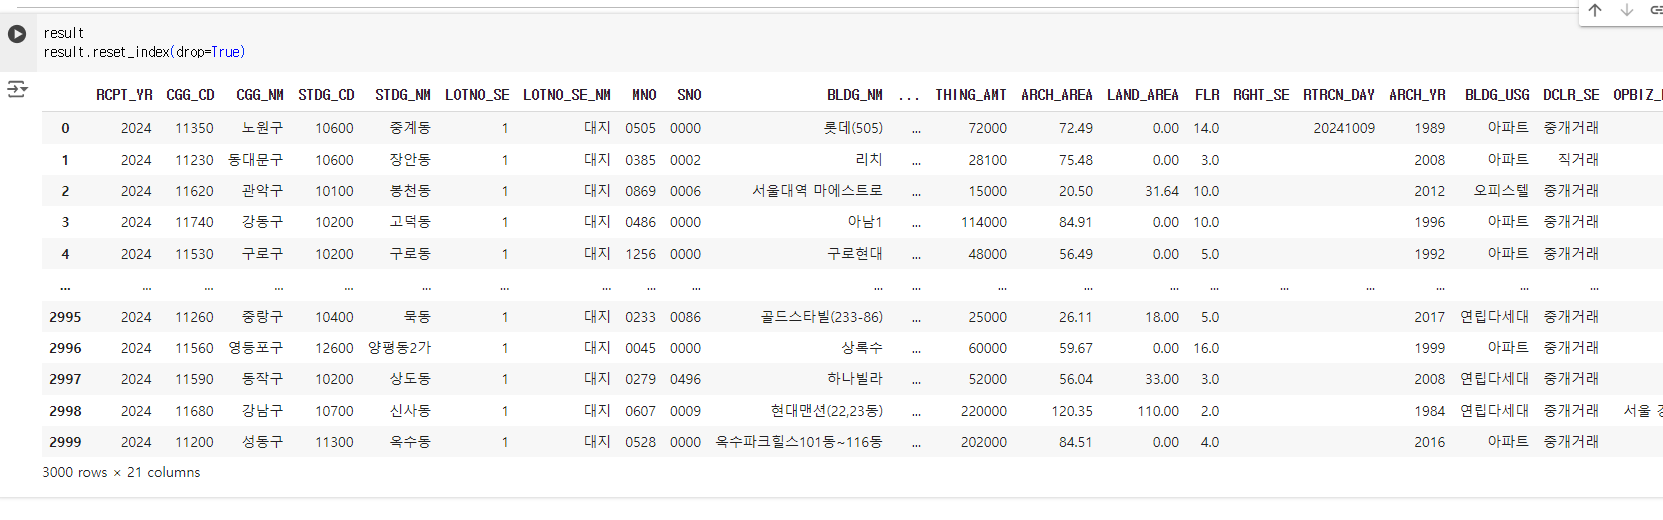

이렇게 하면 concat 메소드의 원리를 제대로 이해할 줄 알아야 함
이렇게 index를 reset 하니까 0부터 2999까지 잘 나오네!

In [107]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

SERVICE_KEY = '494f62475364617435356b45435171'
url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/xml/tbLnOpendataRtmsV/1/5/2023/11500/강서구/'
req = requests.get(url)
req

<Response [200]>

In [108]:
soup = BeautifulSoup(req.content, "lxml") # html.parser
print(soup.prettify())

<?xml version="1.0" encoding="UTF-8"?>
<html>
 <body>
  <tblnopendatartmsv>
   <list_total_count>
    5095
   </list_total_count>
   <result>
    <code>
     INFO-000
    </code>
    <message>
     정상 처리되었습니다
    </message>
   </result>
   <row>
    <rcpt_yr>
     2023
    </rcpt_yr>
    <cgg_cd>
     11500
    </cgg_cd>
    <cgg_nm>
     강서구
    </cgg_nm>
    <stdg_cd>
     10300
    </stdg_cd>
    <stdg_nm>
     화곡동
    </stdg_nm>
    <lotno_se>
     1
    </lotno_se>
    <lotno_se_nm>
     대지
    </lotno_se_nm>
    <mno>
     1081
    </mno>
    <sno>
     0006
    </sno>
    <bldg_nm>
     드림파크빌
    </bldg_nm>
    <ctrt_day>
     20231230
    </ctrt_day>
    <thing_amt>
     24000
    </thing_amt>
    <arch_area>
     58.26
    </arch_area>
    <land_area>
     33.280000
    </land_area>
    <flr>
     5
    </flr>
    <rght_se>
    </rght_se>
    <rtrcn_day>
    </rtrcn_day>
    <arch_yr>
     2011
    </arch_yr>
    <bldg_usg>
     연립다세대
    </bldg_usg>
    <dclr_se>
     중개거래
  

<ipython-input-108-67afbbe320e3>:1: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(req.content, "lxml") # html.parser


In [109]:
years            = soup.find_all('rcpt_yr')         # 접수년월
CGG_CDs          = soup.find_all('cgg_cd')
len(years), len(CGG_CDs)

(5, 5)

In [118]:
years            = soup.find_all('rcpt_yr')         # 접수년월
CGG_CDs          = soup.find_all('cgg_cd')
stdg_nms =  soup.find_all('stdg_nm')
print(stdg_nms)

year_list           = []
sgg_cd_list         = []
stdg_nm_list =        []

for year, cgg_cd, stdg_nm in zip(years, CGG_CDs, stdg_nms):
  year_list.append(year.get_text())
  sgg_cd_list.append(cgg_cd.get_text())
  stdg_nm_list.append(stdg_nm.get_text())

df = pd.DataFrame({
    "rcpt_yr": year_list,
    "cgg_cd" : sgg_cd_list,
    "stdg_nm" : stdg_nm_list
})

df
#stdg_nm_list

[<stdg_nm>화곡동화곡동화곡동화곡동</stdg_nm>, <stdg_nm>화곡동화곡동화곡동화곡동</stdg_nm>, <stdg_nm>화곡동화곡동화곡동화곡동</stdg_nm>, <stdg_nm>가양동가양동가양동가양동</stdg_nm>, <stdg_nm>방화동방화동방화동방화동</stdg_nm>]


,rcpt_yr,cgg_cd,stdg_nm
0,2023,11500,화곡동화곡동화곡동화곡동
1,2023,11500,화곡동화곡동화곡동화곡동
2,2023,11500,화곡동화곡동화곡동화곡동
3,2023,11500,가양동가양동가양동가양동
4,2023,11500,방화동방화동방화동방화동


In [119]:
!pip install xmltodict

In [128]:
import requests
import json
import xmltodict
import pandas as pd
serviceKey = 'SDEjyCFJI1ki5hZaMAvBGUsre6U38rZKkVug%2BDGju9aAUp9G7%2B1tQagaeWcG2trJmx1%2BXe0JANCSgpGnLFuOPA%3D%3D'
mykey='m2yVFfwQG58ZPS21q0ebFWxDW%2F8QP1Y%2BhgjSFY9rb2eFBXqU3bTfxvz26jUgU2PxwZkGB6I5eQgP4FijdfKsSA%3D%3D' # 재현 개인 API인증키
pageNo = 1 # 페이지 번호
numOfRows = 500 # 한 페이지 결과수
LAWD_CD = 11500 # 지역코드
DEAL_YMD = 202101 # 계약월
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?serviceKey={mykey}&pageNo={pageNo}&numOfRows={numOfRows}&LAWD_CD={LAWD_CD}&DEAL_YMD={DEAL_YMD}'
req = requests.get(url)
req

<Response [200]>

In [121]:
req.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>    70,000</거래금액><거래유형> </거래유형><건축년도>1996</건축년도><년>2021</년><도로명>양천로75길</도로명><도로명건물본번호코드>00060</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11500</도로명시군구코드><도로명일련번호코드>01</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4145429</도로명코드><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 염창동</법정동><법정동본번코드>0291</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11500</법정동시군구코드><법정동읍면동코드>10100</법정동읍면동코드><법정동지번코드>1</법정동지번코드><아파트>현대3</아파트><월>1</월><일>3</일><일련번호>11500-30</일련번호><전용면적>59.92</전용면적><중개사소재지> </중개사소재지><지번>291</지번><지역코드>11500</지역코드><층>12</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>    85,500</거래금액><거래유형> </거래유형><건축년도>1992</건축년도><년>2021</년><도로명>양천로67길</도로명><도로명건물본번호코드>00054</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11500</도로명시군구코드><도로명일련번호코드>01</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4145422</도로명코드><동>

In [122]:
contents = xmltodict.parse(req.text) # XML을 dictionary로 변환
contents

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'},
  'body': {'items': {'item': [{'거래금액': '    70,000',
      '거래유형': ' ',
      '건축년도': '1996',
      '년': '2021',
      '도로명': '양천로75길',
      '도로명건물본번호코드': '00060',
      '도로명건물부번호코드': '00000',
      '도로명시군구코드': '11500',
      '도로명일련번호코드': '01',
      '도로명지상지하코드': '0',
      '도로명코드': '4145429',
      '동': ' ',
      '등기일자': ' ',
      '매도자': ' ',
      '매수자': ' ',
      '법정동': ' 염창동',
      '법정동본번코드': '0291',
      '법정동부번코드': '0000',
      '법정동시군구코드': '11500',
      '법정동읍면동코드': '10100',
      '법정동지번코드': '1',
      '아파트': '현대3',
      '월': '1',
      '일': '3',
      '일련번호': '11500-30',
      '전용면적': '59.92',
      '중개사소재지': ' ',
      '지번': '291',
      '지역코드': '11500',
      '층': '12',
      '해제사유발생일': ' ',
      '해제여부': ' '},
     {'거래금액': '    85,500',
      '거래유형': ' ',
      '건축년도': '1992',
      '년': '2021',
      '도로명': '양천로67길',
      '도로명건물본번호코드': '00054',
      '도로명건물부번호코드': '00000',
      '도로명시군구코드'

In [123]:
print(type(contents))

<class 'dict'>


In [124]:
data = pd.DataFrame(contents['response']['body']['items']['item'])
data.head()

,거래금액,거래유형,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,...,월,일,일련번호,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"70,000",,1996,2021,양천로75길,00060,00000,11500,01,0,...,1,3,11500-30,59.92,,291,11500,12,,
1,"85,500",,1992,2021,양천로67길,00054,00000,11500,01,0,...,1,5,11500-23,84.7,,287-1,11500,12,,
2,"98,000",,2005,2021,공항대로,00637,00000,11500,01,0,...,1,5,11500-5104,84.84,,282-19,11500,4,,
3,"80,300",,1994,2021,양천로75길,00057,00000,11500,01,0,...,1,5,11500-28,84.34,,288,11500,2,,
4,"74,800",,1995,2021,양천로,00637,00000,11500,01,0,...,1,6,11500-16,59.94,,244-2,11500,7,,


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   거래금액        328 non-null    object
 1   거래유형        328 non-null    object
 2   건축년도        328 non-null    object
 3   년           328 non-null    object
 4   도로명         328 non-null    object
 5   도로명건물본번호코드  328 non-null    object
 6   도로명건물부번호코드  328 non-null    object
 7   도로명시군구코드    328 non-null    object
 8   도로명일련번호코드   328 non-null    object
 9   도로명지상지하코드   326 non-null    object
 10  도로명코드       328 non-null    object
 11  동           328 non-null    object
 12  등기일자        328 non-null    object
 13  매도자         328 non-null    object
 14  매수자         328 non-null    object
 15  법정동         328 non-null    object
 16  법정동본번코드     328 non-null    object
 17  법정동부번코드     328 non-null    object
 18  법정동시군구코드    328 non-null    object
 19  법정동읍면동코드    328 non-null    object
 20  법정동지번코드   